# Investigating a Dataset - Titanic Data

Which factors influenced survival on the famous ship disaster? The variables to examine:

1. Passenger Age. Was there an advantage to the youth or eldery?
2. Passenger Sex. Male or female, is there an advantage?
3. Passenger Class. Are 1st class more likely to be saved than the 2nd or 3rd?
4. \# Number of Siblings/Spouses/Parents/Children on board. How does this influence survival.


# Data Import

In [145]:
#libraries import
from scipy.stats import chi2_contingency as chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

#file load
file_name = 'titanic-data.csv'
main_df = pd.read_csv(file_name)

Populating the interactive namespace from numpy and matplotlib


In [146]:
pop_mean_survive = main_df['Survived'].value_counts(normalize = True)[1]

print main_df['Survived'].value_counts()

print main_df['Survived'].value_counts(normalize = True)

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


# Sample Data Analysis
[ref]: https://www.kaggle.com/c/titanic/data "Reference Sheet"
The data contains 891/2224 passengers and crew on the Titantic. Click here for the [Reference Sheet][ref] for the data values.

Out of the 891 we have 342 survivors. The proportion of survivors is 0.383838


#Data Cleanup
I'd like to analyze the effects of age, sex, passenger class, passenger fare cost, and the number of close relatives on board to survivor rates and determine which effect, or perhaps which combination of effects results in greatest chance to survive the titantic shipwreck.

Due to some records having incomplete information I will create dataframes that only include fields with data for the records.

In [147]:
#data frame for users with age data
main_age_df = main_df.loc[pd.notnull(main_df['Age'])]
main_children_df = main_age_df.loc[main_age_df['Age'] < 16]

#data frames for users with sex data
main_male_df = main_df.loc[main_df['Sex'] == 'male']
main_female_df = main_df.loc[main_df['Sex'] == 'female']

#data frame for users with pClass data
main_pclass_df = main_df.loc[pd.notnull(main_df['Pclass'])]

#data frame for users with sibs on board data
#main_sibs_df = main_df.loc[pd.notnull(main_df['SibSp'])]

In [148]:
def chi_calc(pivot):
    chi2_val, p_value, dof, expected = chi2(pivot)
    
    print "Degree of Freedom = " + str(dof)
    print "Chi-Squared Score = " + str(chi2_val)
    print "Pvalue = " + str(p_value) 
    print "Expected = " + str(expected)

In [149]:

#function for printing out typical stats, as well as extra stats
def t_calc(ds, col, pop_mean):
    ds_mean = ds[col].mean()
    ds_std = ds[col].std(ddof=1)
    ds_standard_error = ds[col].sem()
    df = ds[col].count() - 1
    t_score = (ds_mean - pop_mean)/ds_standard_error
    cohens_d = (ds_mean - pop_mean)/ds_std
    
    col_length = len(col) + 22
    
    print "Population Mean: ".rjust(col_length) + str(pop_mean)
    print (col + " Sample Mean: ").rjust(col_length) + str(ds_mean)
    print (col + " Std Deviation: ").rjust(col_length) + str(ds_std)
    print (col + " Standard Error: ").rjust(col_length) + str(ds_standard_error)
    print (col + " Degrees of Freedom: ").rjust(col_length) + str(df)
    print (col + " t score: ").rjust(col_length) + str(t_score)
    print (col + " Margin of Error: ").rjust(col_length) + "(" + str(ds_mean - ds_standard_error) + "," + str(ds_mean + ds_standard_error) + ")"
    print (col + " Cohen's D: ").rjust(col_length) + str(cohens_d)

# Age Statistics
I started with collecting the population mean and standard deviation of ages and printing out general information I then calculated the mean ages of survivors only, calculated standard error from the mean pop, and calculated a t-score for the survivor mean.


In [150]:


mean_of_ages = main_age_df['Age'].mean()

print 'Information on All Passenger Ages'
print main_age_df['Age'].describe()
print ''
print "Information Grouped by 0 (did not survive) and 1 (survived)"
print main_age_df.groupby('Survived', as_index = False)['Age'].describe()


Information on All Passenger Ages
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Information Grouped by 0 (did not survive) and 1 (survived)
   count       mean        std   min   25%   50%   75%   max
0  424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1  290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


# Age Analysis

H-null: (Mean of Ages of Population) = (Mean Age of Survivors)

H-alt: (Mean of Ages of Population) != (Mean Age of Survivors)

Therefore I will perform a 1 sample 2 tailed t-test with alpha levels 0.05


In [151]:
t_calc(main_age_df.loc[main_age_df['Survived'] == 1], 'Age', mean_of_ages)

        Population Mean: 29.6991176471
        Age Sample Mean: 28.3436896552
      Age Std Deviation: 14.9509519841
     Age Standard Error: 0.877950130608
 Age Degrees of Freedom: 289
            Age t score: -1.54385533373
    Age Margin of Error: (27.4657395246,29.2216397858)
          Age Cohen's D: -0.0906583067971


<table>
<tr>
    <td>Statistic</td>
    <td>Value</td>
</tr>
<tr>
    <td>t-critcal</td>
    <td>+/-1.9682</td>
</tr>
<tr>
    <td>t-score</td>
    <td>-1.54385533373</td>
</tr>
<tr>
    <td>p-score</td>
    <td>0.1237</td>
</tr>
</table>

t-critical and p-score calculated with http://www.graphpad.com/quickcalcs/pValue2/ 

With the t-score and corresponding p-score we can accept H-null that the difference in age in survivors to the total population is not significant. The below histogram also illustrate the the closeness of the values

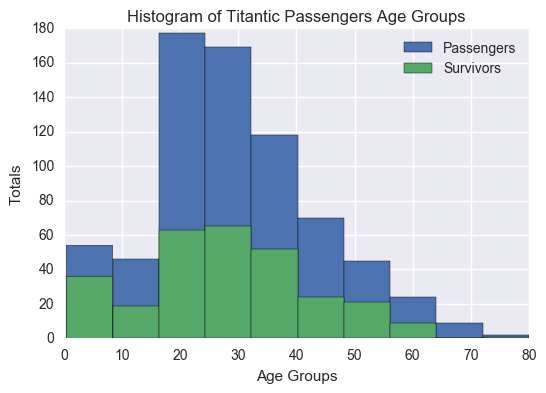

In [152]:
plt.title("Histogram of Titantic Passengers Age Groups")
plt.ylabel("Totals")
plt.xlabel("Age Groups")
plt.hist(main_age_df['Age'], label='Passengers')
plt.hist(main_age_df.loc[main_age_df['Survived'] == 1]['Age'], label='Survivors')
plt.legend()

I noticed in the Histogram of Titantic Passengers Age groups the first bin from 0-10 was nearer to the total for any other bin.

Let's investigate the children survival rate assuming children were consider under 16 years of age. 

# Children Survival Analysis

H-null: Age and Surviving are independent

H-alt: Age and Surviving are not independent

Therefore I will perform a chi test for independence with significant levels of 0.05



In [153]:
full_ages_pivot = pd.pivot_table(data = main_age_df[['Survived', 'Age']], index = 'Survived', columns = ['Age'], aggfunc = len, fill_value=0)

#print full_ages_pivot

#create a pivot of age categories, under 16, 16 to 55, and older than 55
categorized_ages = pd.DataFrame(0, index= {0,1}, columns={'under16','under55', 'old' }, dtype='float')

#print categorized_ages

for col in full_ages_pivot.columns.values:    
    if col < 16:
        categorized_ages['under16'][0] = categorized_ages['under16'][0] + full_ages_pivot[col][0]
        categorized_ages['under16'][1] = categorized_ages['under16'][1] + full_ages_pivot[col][1]
    elif col < 55: 
        categorized_ages['under55'][0] = categorized_ages['under55'][0] + full_ages_pivot[col][0]
        categorized_ages['under55'][1] = categorized_ages['under55'][1] + full_ages_pivot[col][1]
    else:
        categorized_ages['old'][0] = categorized_ages['old'][0] + full_ages_pivot[col][0]
        categorized_ages['old'][1] = categorized_ages['old'][1] + full_ages_pivot[col][1]

print categorized_ages
print ''

chi_calc(categorized_ages)



   under16  under55   old
0     34.0    361.0  29.0
1     49.0    228.0  13.0

Degree of Freedom = 2
Chi-Squared Score = 14.1896676576
Pvalue = 0.000829378586308
Expected = [[  49.28851541  349.77030812   24.94117647]
 [  33.71148459  239.22969188   17.05882353]]


Witha p ~ 0.0008 we can reject the null hypothesis. When analyzing for the entire distribution of age ranges there is no significant difference, but when we categorize into common age groups we see there is difference. 

The under 16 group in particular has higher survival count in comparison to the other two groups. We an say age correlated to survival for this particular group.

# Gender Analysis

H-null: Sex and Surviving are independent

H-alt: Sex and Surviving are not independent

Therefore I will perform a chi test for independence with significant levels of 0.05



In [154]:
sexy_pivot = pd.pivot_table(data = main_age_df[['Survived', 'Sex']], index = 'Survived', columns = ['Sex'], aggfunc = len, fill_value=0)

print sexy_pivot

chi_calc(sexy_pivot)

Sex       female  male
Survived              
0             64   360
1            197    93
Degree of Freedom = 1
Chi-Squared Score = 205.025827529
Pvalue = 1.67166784414e-46
Expected = [[ 154.99159664  269.00840336]
 [ 106.00840336  183.99159664]]


With p ~ 0.0001 we can reject the null hypothesis.  Sex appears to play a factor in determining survival on the titantic.

# Passenger Class Analysis

H-null: Passenger Class and Surviving are independent
H-alt: Passenger Class and Surviving are not independent
Therefore I will perform a chi test for independence with significant levels of 0.05



In [155]:
classy_pivot = pd.pivot_table(data = main_age_df[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len, fill_value=0)
print classy_pivot

Pclass      1   2    3
Survived              
0          64  90  270
1         122  83   85


From the data source:

https://www.kaggle.com/c/titanic/data

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

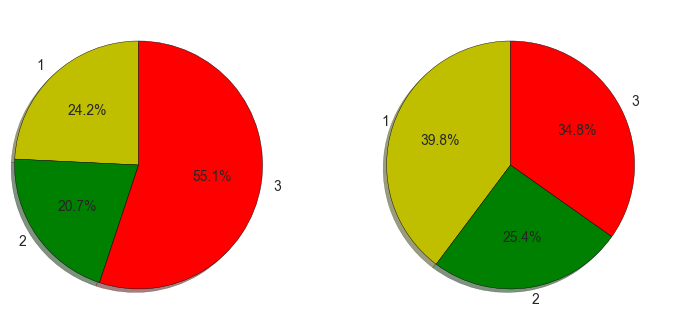

In [156]:
fig = plt.figure()
ax = fig.gca()

plot_vals = main_pclass_df.groupby('Pclass')['PassengerId'].count()
plot_labs = plot_vals.index.values

survived_plot_vals = main_pclass_df.loc[main_pclass_df['Survived'] == 1].groupby('Pclass')['PassengerId'].count()
survived_plot_labs = plot_vals.index.values

#ax.title("Diagram of Survivors by Passenger Class")

ax.pie(plot_vals, labels=plot_labs, colors=('y', 'g', 'r'), autopct='%1.1f%%', 
       shadow=True, startangle=90, center = (0, 1), radius=1)
#plt.axis('equal')

ax.pie(survived_plot_vals, labels=survived_plot_labs, colors=('y', 'g', 'r'), autopct='%1.1f%%',
       shadow=True, startangle=90, center = (3, 1), radius=1)
#plt.axis('equal')

ax.set_aspect('equal')

Based on the counts and the above histogram we can see the 1st class has the highest number of survivors but only 2nd most number of passengers. 

In [157]:
chi_calc(classy_pivot)

Degree of Freedom = 2
Chi-Squared Score = 92.9014172114
Pvalue = 6.70986174976e-21
Expected = [[ 110.45378151  102.73389356  210.81232493]
 [  75.54621849   70.26610644  144.18767507]]


With p ~ 0.0001 we can reject the null hypothesis. The statistics suggest passenger class influences survival on the titantic

# Sibling/Parents On board Analysis

H-null: Sibling/Parents on board and Surviving are independent

H-alt: Siblings/Parents on board are not independent

Therefore I will perform a chi test for independence with significant levels of 0.05

In [158]:
print main_df.groupby(['SibSp', 'Parch'], as_index = False)['PassengerId'].count()

    SibSp  Parch  PassengerId
0       0      0          537
1       0      1           38
2       0      2           29
3       0      3            1
4       0      4            1
5       0      5            2
6       1      0          123
7       1      1           57
8       1      2           19
9       1      3            3
10      1      4            3
11      1      5            3
12      1      6            1
13      2      0           16
14      2      1            7
15      2      2            4
16      2      3            1
17      3      0            2
18      3      1            7
19      3      2            7
20      4      1            9
21      4      2            9
22      5      2            5
23      8      2            7


We can see from above there is a high number of passengers without either siblings or parents on board. The next codeblock seperates the two passenger groups (with and without siblings/parents)

In [159]:
main_without_sibspar_df = main_df.loc[main_df['SibSp'] == 0].merge(main_df.loc[main_df['Parch'] == 0])

main_with_sibspar_df = main_df.loc[main_df['SibSp'] != 0].merge(main_df.loc[main_df['Parch'] != 0], how='outer')

# adding a total relative column to the sibspar df
main_with_sibspar_df['Total_Rel'] = main_with_sibspar_df['SibSp'] + main_with_sibspar_df['Parch']


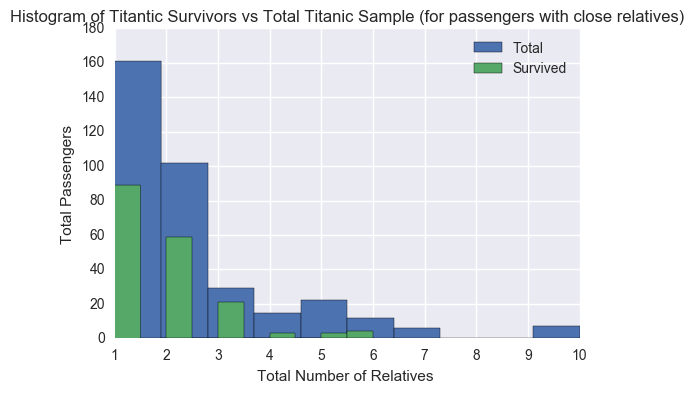

In [160]:
plt.title("Histogram of Titantic Survivors vs Total Titanic Sample (for passengers with close relatives)")
plt.ylabel("Total Passengers")
plt.xlabel("Total Number of Relatives ")
plt.xlim([1, 10])

plt.hist(main_with_sibspar_df['Total_Rel'], label='Total')
plt.hist(main_with_sibspar_df.loc[main_with_sibspar_df['Survived'] == 1]['Total_Rel'], label='Survived')
plt.legend()

In the above histogram it demonstrates having 3 total relatives on board correlates to higher survival in comparison to other values.

In [161]:


total_piv = pd.pivot_table(data = main_with_sibspar_df[['Survived', 'Total_Rel']], index = 'Survived', columns = ['Total_Rel'], aggfunc = len, fill_value=0)

print total_piv
#without_piv = pd.pivot_table(data = main_without_sibspar_df['Survived'], index = 'Survived', columns = ['Survived'], aggfunc = len, fill_value=0)

#print sib_piv

chi_calc(total_piv)




Total_Rel  1.0   2.0   3.0   4.0   5.0   6.0   7.0   10.0
Survived                                                 
0.0          72    43     8    12    19     8     6     7
1.0          89    59    21     3     3     4     0     0
Degree of Freedom = 7
Chi-Squared Score = 41.4622141947
Pvalue = 6.59887089072e-07
Expected = [[ 79.59039548  50.42372881  14.33615819   7.41525424  10.87570621
    5.93220339   2.96610169   3.46045198]
 [ 81.40960452  51.57627119  14.66384181   7.58474576  11.12429379
    6.06779661   3.03389831   3.53954802]]


With p ~ 0.0001 we can reject the null hypothesis. The statistics suggest siblings or parents on board influence survival on the titantic

# Conclusions

Based on the above statistics, the following variables correlate to higher likelihood of survival of the Titantic

* Passenger age 
* Passenger Sex
* Passenger Class
* Riding with siblings or parents.

This is not to say these factors caused the passenger survival. 

I used the chi-test throughout the analysis since we used categorical data. Alas, we can demonstrate dependability with this but cannot make much further inferences. I have confidence the tests demonstrate adequately that there is correlation with the above variables to survival.

I assumed sex and age would be factors. 'Women and children first' was a common maritime code so it came this should be obvious.

In fact, I found all influencing characteristics in each of the 4 variables. 

Investigating the ages of survivors as a whole showed there was not a sigficant impact as an entire group. However, it provided a clue to look deeper at the survivability of young people on the ship. Therefore I performed the chi test with grouped data on the population. Here it was found the group under 16 years of age do have a higher chance of survival, than the rest of the population.

Based on counts alone for sexes it was shown female had higher survivability compared to men which was much lower. With regards to the maritime code, there was also speculation that some of the officers onboard the Titantic misinterpreted this as 'women and children only', as many lifeboats were not at capacity and were being released to the water if women and children were not around to fill the seats. 

https://en.wikipedia.org/wiki/RMS_Titanic

Passenger class also affected survival. Based on counts/proportion we can infer 1st and 2nd class had a higher chance to survive. It would be interesting to analyze this further, especially with regards to the boat structure and where the lifeboats were in regards to the class sections.

Finally, in analyzing passengers riding with siblings or parents it was found there was also a correlation. Based on the "Histogram of Titantic Survivors vs Total Titanic Sample (for passengers with close relatives)" it seems that groups beyond a certain size (4 total) had better survivability than the smaller groups. This statistic is interesting, since it correlates travelling in a group will net you a better outcome in a disaster. It would be interesting to see data on husband/wife entries as well. I am not confident with this statistic personally, as I am with the age, sex and class.

For example, single riders fared worse than the average. However, majority of single riders (411/537) were men as well, and more than half (264) where in the 3rd class. Should the single rider's unluck be attributed to their being alone? One would think if you are looking after yourself you should be able to get to safety.

